# DEBUGGING / NULSTIL SUBTITLES DOWNLOAD NEDENFOR FJERNES

In [ ]:
!unzip subtitles.zip

unzip:  cannot find or open subtitles.zip, subtitles.zip.zip or subtitles.zip.ZIP.


In [ ]:
## DELETE SUBTITLES FOLDER
import shutil
import os

# Angiv stien til mappen, der skal slettes
mappe_sti = 'subtitles'

# Tjek om mappen eksisterer
if os.path.exists(mappe_sti) and os.path.isdir(mappe_sti):
    # Slet mappen og dens indhold
    shutil.rmtree(mappe_sti)
    print(f'Mappen "{mappe_sti}" er blevet slettet.')
else:
    print(f'Mappen "{mappe_sti}" findes ikke.')


Mappen "subtitles" findes ikke.


# In Class & Final Assignment
## AI Technology Market Analysis Assignment
### Group Project Using NLP and Network Analysis

---

## Overview
Conduct a comprehensive analysis of AI technology markets by combining Natural Language Processing (NLP) and Network Analysis techniques. Use either the provided dataset or identify suitable alternative data sources that enable meaningful insights into AI market dynamics.

---

## Core Requirements

### Data Processing with LLMs
Implement local or cloud-based Large Language Models (LLMs) to:
- Extract and structure relevant market data
- Identify network relationships between entities
- Perform named entity recognition and extraction
- Transform unstructured text into analyzable formats

### Network Analysis
Design and construct meaningful networks from the extracted data:
- Implement bi-partite network analysis and corresponding projections
- Calculate and interpret key network metrics:
  - Various centrality measures
  - Network structure indicators
  - Community detection (if applicable)
- Provide clear interpretation of network analysis results

### Text Classification
Select and implement one of these approaches:
- LLM-based classification system
- Few-shot learning implementation using SetFit
- Traditional NLP classification methods (using existing or synthetic training data)

---

## Optional Extensions

### Topic Modeling
Leverage LLMs to extract and categorize key themes and topics:
- Apply BERTopic for advanced topic modeling
- Create clear and insightful visualizations of:
  - Topic distributions
  - Theme relationships
  - Temporal patterns (if applicable)

---

## Deliverables

### Analysis Notebooks
Well-documented Jupyter notebooks containing:
- Complete analysis pipeline
- Clear code documentation
- Inline result interpretation
- Reproducible implementation

### Executive Summary
Concise PDF slide deck (max 6 slides) including:
- Problem statement and approach
- Key findings and insights
- Visual representation of critical results


### Install & Import Libraries

In [ ]:
# importing the clear_output function from IPython.display module to reduce noise in outputs...
from IPython.display import clear_output

# Datascrapping libs
import os
import requests
from bs4 import BeautifulSoup
import time

# Datahandling
import os
import re

# LLM Libs & Setup
!pip install openai # installs the openai package

from openai import OpenAI
from google.colab import userdata # needed for secret api-keys in Google Colab
import json
from pydantic import BaseModel, Field
from typing import List, Optional
import textwrap

# Network analysis
# install not stuff - assuming the rest is installed
!pip install holoviews python-louvain

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
import networkx as nx
import holoviews as hv
from community import community_louvain
from holoviews import opts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


### Setup + Data Extraction

#### Fetching Breaking Bad Data from Fandom (using subtitles of each season/episode)

In [ ]:
# Base URL
base_url = "https://breakingbad.fandom.com/wiki/Category:Breaking_Bad_Subtitles"

def get_season_links(base_url, target_seasons):
    response = requests.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    season_links = []

    for link in soup.select('a.category-page__member-link'):
        for season in target_seasons:
            if f"Season_{season}" in link['href']:
                season_links.append("https://breakingbad.fandom.com" + link['href'])
    return season_links

def get_episode_links(season_url):
    response = requests.get(season_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    episode_links = []
    for link in soup.select('a.category-page__member-link'):
        episode_links.append("https://breakingbad.fandom.com" + link['href'])
    return episode_links

def get_subtitles(episode_url):
    response = requests.get(episode_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    subtitle_pre = soup.find("pre")
    if subtitle_pre:
        subtitles = subtitle_pre.get_text(strip=True)
        return subtitles
    return ""

def save_subtitles(episode_name, subtitles, season):
    # Handle "5A" and "5B" cases
    season_folder = f"Season_{season}"
    os.makedirs(f"subtitles/{season_folder}", exist_ok=True)
    file_path = f"subtitles/{season_folder}/{season_folder} - {episode_name}.txt"
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(subtitles)

def scrape_and_save_subtitles():
 #   target_seasons = [1, 2, 3, 4, "5A", "5B"] # ALL SEASONS
    target_seasons = [1] # ONLY SEASON 1?
    season_links = get_season_links(base_url, target_seasons)

    for season_url in season_links:
        # Extract season from URL
        season = None
        for s in target_seasons:
            if f"Season_{s}" in season_url:
                season = s
                break

        if season:
            episode_links = get_episode_links(season_url)
            for episode_url in episode_links:
                subtitles = get_subtitles(episode_url)
                episode_name = episode_url.split("/")[-1].replace("_", " ")
                save_subtitles(episode_name, subtitles, season)
                print(f"Saved subtitles for {episode_name} in Season {season}")
# Run the scraper and saver
scrape_and_save_subtitles()

clear_output()
print("Manuscript Saved!")

Manuscript Saved!


#### Data Cleaning

In [ ]:
def clean_subtitle(input_text):
    # Fjern linjer med tidsstempler og numre
    lines = input_text.split('\n')
    cleaned_lines = []
    skip_next = False

    for line in lines:
        if skip_next:
            skip_next = False
            continue
        if re.match(r'^\d+$', line.strip()) or '-->' in line:
            skip_next = True
            continue
        if line.strip():
            cleaned_lines.append(line.strip())

    return ' '.join(cleaned_lines)

def process_directory(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith('.txt'):
                file_path = os.path.join(dirpath, filename)

                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()

                cleaned_content = clean_subtitle(content)

                with open(file_path, 'w', encoding='utf-8') as file:
                    file.write(cleaned_content)
# path to the folder containing our fetched subtitles
root_directory = 'subtitles/'

process_directory(root_directory)

In [ ]:
def combine_txt_files(root_dir, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        for dirpath, dirnames, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.endswith('.txt'):
                    file_path = os.path.join(dirpath, filename)
                    # filename as head for each section
                    outfile.write(f"\n\n--- {filename} ---\n\n")
                    with open(file_path, 'r', encoding='utf-8') as infile:
                        outfile.write(infile.read())
                    outfile.write("\n")  # new line after each episode

# path to subtitles folder
subtitles_dir = 'subtitles'

# output file definition
output_file = 'combined.txt'

# combine txt function
combine_txt_files(subtitles_dir, output_file)

print(f"All .txt files has been combined.")

All .txt files has been combined.


### Definition of Extraction Schema

In [ ]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14346 sha256=b924282b5ca55b593e82b40eac7e2b7603a5ac9634cb7d5bccafad38588efabc
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api


In [ ]:
import wikipediaapi

# we initialize the wikipedia api
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',  # we set the language to english
    user_agent='BreakingBadNetwork/1.0'  # we insert a user-agent string for wiki
)

# we fetch a specific article
page = wiki_wiki.page('List of characters in the Breaking Bad franchise')

# we check if the article exists and print the entire content
if page.exists():
    article_content = page.text # saves the article as variable
    print("Title: ", page.title)
    print("Content: ", page.text[:100])  # we retrieve the entire text of the article
else:
    print("the article does not exist")

# save as a file
with open("wiki_breaking_bad_characters.txt", "w", encoding="utf-8") as file:
    file.write(page.text)

Title:  List of characters in the Breaking Bad franchise
Content:  Breaking Bad is a crime drama franchise created by American filmmaker Vince Gilligan. It started wit


In [ ]:
SYSTEM_PROMPT = f"""
You are an assistant specialized in analyzing and structuring information about TV series. Your task is to help build a network of relationships between various entities in a given TV series, based on the following summary:

Background Information:
{article_sum}

This series features a range of characters involved in complex relationships. Your primary goal is to analyze these connections and structure them into JSON format.

Your task includes:
1. Identifying relevant entities such as characters, locations, events, and seasons in the series.
2. Establishing meaningful relationships between these entities, noting when each relationship occurs (season).

Key Guidelines:
- Each entity should have a unique name and a defined type (e.g., 'character', 'location').
- Relationships must always specify the source entity, target entity, relationship type, and season.
- Use only predefined relationship types provided.

Additionally, you should:
- Be able to answer questions about the structure and relationships in the series.
- Offer suggestions for expanding or refining the network.
- Identify central characters, significant events, and key locations, using network connections as a basis for insight into the series' narrative structure and character development.

Explain your choices and reasoning as needed, ensuring that your analysis aids in understanding the series’ narrative structure over time.

Output JSON only.
"""

## TOGETHER API?? BETTER?

In [ ]:
# Setup OpenAI client with custom TogetherAPI key and base URL
TOGETHER_API_KEY = userdata.get('TOGETHER_API_KEY')

client = OpenAI(
    base_url="https://api.together.xyz/v1",
    api_key=TOGETHER_API_KEY
)

In [ ]:
SUM_PROMPT = """
You are an expert analyst of fictional characters. Your task is to summarize key information about characters from the Breaking Bad universe. For each character provided, you should:

1. State their name
2. Describe their primary role in the story
3. Outline their key relationships to other characters

Your summary should be concise yet informative, focusing only on the most important aspects of each character. Avoid including any information not explicitly provided in the input. If you're unsure about any details, do not speculate.

Format your response as a bullet-point list, with each character as a main point and their details as sub-points. You need to focus on that you state the different variances of the characters names in the summary.

Example format:
• Character Name:
  - Role: [Brief description of their role]
  - Key Relationships: [List of important relationships]

Provide this summary based solely on the information given in the input, without adding any external knowledge about Star Wars.
"""

response = client.chat.completions.create(
    model='meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo',
    messages=[
        {'role': 'system', 'content': SUM_PROMPT},
        {'role': 'user', 'content': f"Summarize these Breaking Bad characters:\n\n{article_content}"}
    ],
    temperature=0.7
)

article_sum = response.choices[0].message.content

In [ ]:
article_sum

'• Walter White:\n  - Role: Main character, a high school chemistry teacher turned meth kingpin\n  - Key Relationships: Skyler White (wife), Jesse Pinkman (business partner), Hank Schrader (brother-in-law and DEA agent)\n\n• Skyler White:\n  - Role: Main character, Walter\'s wife\n  - Key Relationships: Walter White (husband), Hank Schrader (brother), Marie Schrader (sister)\n\n• Jesse Pinkman:\n  - Role: Main character, a small-time meth user and dealer who becomes Walter\'s business partner\n  - Key Relationships: Walter White (business partner), Andrea Cantillo (love interest), Jane Margolis (ex-girlfriend)\n\n• Hank Schrader:\n  - Role: Main character, a DEA agent and Walter\'s brother-in-law\n  - Key Relationships: Walter White (brother-in-law), Marie Schrader (wife), Steve Gomez (DEA partner)\n\n• Marie Schrader:\n  - Role: Main character, Hank\'s wife and Skyler\'s sister\n  - Key Relationships: Hank Schrader (husband), Skyler White (sister), Walter White (brother-in-law)\n\n• W

In [ ]:
import json
import os
from typing import Dict, Any

# path to the subtitles directory
subtitles_dir = 'subtitles'

def extract_relationships(script_content: str, episode_name: str, season_number: int) -> Dict[str, Any]:
    prompt = f"""
    Analyze the following Breaking Bad episode script and identify entities and their relationships.
    Episode: {episode_name}
    Season: {season_number}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character" | "Location" | "Event" | "Season"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "lives in" | "visits" | "owns" | "participates in" | "witnesses" | "causes" | "appears in" | "is central to" | "introduces" | "concludes" | "develops" | "part of",
                "target": "string",
                "season": {season_number}
            }}
        ]
    }}

    Script content:
    {script_content[:1000]}...
    """

    try:
        response = client.chat.completions.create(
            model='Qwen/Qwen2.5-72B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        response_text = response.choices[0].message.content.strip()

        # get response and fix weird characters
        response_text = ''.join(char for char in response.choices[0].message.content if ord(char) >= 32 or char in '\n\r\t')


        # Ensure we get valid JSON
        try:
            data = json.loads(response_text)
            return data
        except json.JSONDecodeError:
            # Fallback: Try to extract JSON from response
            json_start = response_text.find('{')
            json_end = response_text.rfind('}') + 1
            if json_start >= 0 and json_end > json_start:
                json_str = response_text[json_start:json_end]
                return json.loads(json_str)
            raise

    except Exception as e:
        print(f"Error processing episode {episode_name}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_episodes(subtitles_dir: str) -> Dict[str, Any]:
    all_episode_data = {}

    for season_dir in sorted(os.listdir(subtitles_dir)):
        season_path = os.path.join(subtitles_dir, season_dir)
        if os.path.isdir(season_path):
            season_number = int(season_dir.split('_')[1]) if season_dir.split('_')[1].isdigit() else 0

            for episode_file in sorted(os.listdir(season_path)):
                if episode_file.endswith('.txt'):
                    episode_path = os.path.join(season_path, episode_file)
                    clean_episode_name = episode_file.replace('%27', "'").replace('%20', " ")

                    try:
                        with open(episode_path, 'r', encoding='utf-8') as file:
                            script_content = file.read()

                        episode_data = extract_relationships(script_content, clean_episode_name, season_number)
                        if episode_data["entities"] or episode_data["relationships"]:
                            all_episode_data[f"{season_dir} - {clean_episode_name}"] = episode_data

                    except Exception as e:
                        print(f"Error reading file {episode_path}: {str(e)}")
                        continue

    return all_episode_data

# Analyze episodes and save results as JSON
all_episode_data = analyze_all_episodes(subtitles_dir)

# Save to JSON file
with open('breaking_bad_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_episode_data, f, indent=4, ensure_ascii=False)

# Optional: Print summary of results
print("\nAnalysis complete! Results saved to 'breaking_bad_analysis.json'")
print(f"Processed {len(all_episode_data)} episodes")

# Optional: Print sample of the data in JSON format
print("\nSample of the data:")
print(json.dumps(dict(list(all_episode_data.items())[:1]), indent=4))


Analysis complete! Results saved to 'breaking_bad_analysis.json'
Processed 7 episodes

Sample of the data:
{
    "Season_1 - Season_1 - ...and the Bag's in the River subtitles.txt": {
        "entities": [
            {
                "name": "Walter White",
                "type": "Character"
            },
            {
                "name": "Hydrogen",
                "type": "Element"
            },
            {
                "name": "Oxygen",
                "type": "Element"
            },
            {
                "name": "Water",
                "type": "Compound"
            },
            {
                "name": "Carbon",
                "type": "Element"
            },
            {
                "name": "Nitrogen",
                "type": "Element"
            },
            {
                "name": "Calcium",
                "type": "Element"
            },
            {
                "name": "Iron",
                "type": "Element"
            },
      

In [ ]:
# meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo

import json
import os
from typing import Dict, Any

# path to the subtitles directory
subtitles_dir = 'subtitles'

def extract_relationships(script_content: str, episode_name: str, season_number: int) -> Dict[str, Any]:
    prompt = f"""
    Analyze the following Breaking Bad episode script and identify entities and their relationships.
    Episode: {episode_name}
    Season: {season_number}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character" | "Location" | "Event" | "Season"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "lives in" | "visits" | "owns" | "participates in" | "witnesses" | "causes" | "appears in" | "is central to" | "introduces" | "concludes" | "develops" | "part of",
                "target": "string",
                "season": {season_number}
            }}
        ]
    }}

    Script content:
    {script_content[:1000]}...
    """

    try:
        response = client.chat.completions.create(
            model='meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        response_text = response.choices[0].message.content.strip()

        # get response and fix weird characters
        response_text = ''.join(char for char in response.choices[0].message.content if ord(char) >= 32 or char in '\n\r\t')


        # Ensure we get valid JSON
        try:
            data = json.loads(response_text)
            return data
        except json.JSONDecodeError:
            # Fallback: Try to extract JSON from response
            json_start = response_text.find('{')
            json_end = response_text.rfind('}') + 1
            if json_start >= 0 and json_end > json_start:
                json_str = response_text[json_start:json_end]
                return json.loads(json_str)
            raise

    except Exception as e:
        print(f"Error processing episode {episode_name}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_episodes(subtitles_dir: str) -> Dict[str, Any]:
    all_episode_data = {}

    for season_dir in sorted(os.listdir(subtitles_dir)):
        season_path = os.path.join(subtitles_dir, season_dir)
        if os.path.isdir(season_path):
            season_number = int(season_dir.split('_')[1]) if season_dir.split('_')[1].isdigit() else 0

            for episode_file in sorted(os.listdir(season_path)):
                if episode_file.endswith('.txt'):
                    episode_path = os.path.join(season_path, episode_file)
                    clean_episode_name = episode_file.replace('%27', "'").replace('%20', " ")

                    try:
                        with open(episode_path, 'r', encoding='utf-8') as file:
                            script_content = file.read()

                        episode_data = extract_relationships(script_content, clean_episode_name, season_number)
                        if episode_data["entities"] or episode_data["relationships"]:
                            all_episode_data[f"{season_dir} - {clean_episode_name}"] = episode_data

                    except Exception as e:
                        print(f"Error reading file {episode_path}: {str(e)}")
                        continue

    return all_episode_data

# Analyze episodes and save results as JSON
all_episode_data = analyze_all_episodes(subtitles_dir)

# Save to JSON file
with open('breaking_bad_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_episode_data, f, indent=4, ensure_ascii=False)

# Optional: Print summary of results
print("\nAnalysis complete! Results saved to 'breaking_bad_analysis.json'")
print(f"Processed {len(all_episode_data)} episodes")

# Optional: Print sample of the data in JSON format
print("\nSample of the data:")
print(json.dumps(dict(list(all_episode_data.items())[:1]), indent=4))


Analysis complete! Results saved to 'breaking_bad_analysis.json'
Processed 7 episodes

Sample of the data:
{
    "Season_1 - Season_1 - ...and the Bag's in the River subtitles.txt": {
        "entities": [
            {
                "name": "Walter White",
                "type": "Character"
            },
            {
                "name": "Hydrogen",
                "type": "Event"
            },
            {
                "name": "Oxygen",
                "type": "Event"
            },
            {
                "name": "Carbon",
                "type": "Event"
            },
            {
                "name": "Nitrogen",
                "type": "Event"
            },
            {
                "name": "Calcium",
                "type": "Event"
            },
            {
                "name": "Iron",
                "type": "Event"
            },
            {
                "name": "Sodium",
                "type": "Event"
            },
            {
      

In [ ]:
# Only characters
import json
import os
from typing import Dict, Any

# Path to the subtitles directory
subtitles_dir = 'subtitles'

def extract_character_relationships(script_content: str, episode_name: str, season_number: int) -> Dict[str, Any]:
    # Adjusted prompt to limit responses to characters only
    prompt = f"""
    Analyze the following Breaking Bad episode script and identify only character entities and their relationships.
    Episode: {episode_name}
    Season: {season_number}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "witnesses" | "causes",
                "target": "string",
                "season": {season_number}
            }}
        ]
    }}

    Script content:
    {script_content[:1000]}...
    """

    try:
        # Generate response from the model
        response = client.chat.completions.create(
            model='meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        response_text = response.choices[0].message.content.strip()

        # Debug: Print the raw response for inspection
        print(f"Raw response for {episode_name}:\n{response_text}")

        # Attempt to extract JSON from the response
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1
        if json_start >= 0 and json_end > json_start:
            json_str = response_text[json_start:json_end]
            data = json.loads(json_str)

            # Filter entities and relationships for characters only
            data['entities'] = [entity for entity in data['entities'] if entity['type'] == "Character"]
            data['relationships'] = [
                rel for rel in data['relationships']
                if rel['source'] in [e['name'] for e in data['entities']]
                and rel['target'] in [e['name'] for e in data['entities']]
            ]

            return data
        else:
            print(f"No JSON found in response for episode {episode_name}")
            return {"entities": [], "relationships": []}

    except json.JSONDecodeError:
        print(f"JSON decoding failed for episode {episode_name}")
        return {"entities": [], "relationships": []}
    except Exception as e:
        print(f"Error processing episode {episode_name}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_episodes(subtitles_dir: str) -> Dict[str, Any]:
    all_episode_data = {}

    for season_dir in sorted(os.listdir(subtitles_dir)):
        season_path = os.path.join(subtitles_dir, season_dir)
        if os.path.isdir(season_path):
            season_number = int(season_dir.split('_')[1]) if season_dir.split('_')[1].isdigit() else 0

            for episode_file in sorted(os.listdir(season_path)):
                if episode_file.endswith('.txt'):
                    episode_path = os.path.join(season_path, episode_file)
                    clean_episode_name = episode_file.replace('%27', "'").replace('%20', " ")

                    try:
                        with open(episode_path, 'r', encoding='utf-8') as file:
                            script_content = file.read()

                        # Get only character relationships from each episode
                        episode_data = extract_character_relationships(script_content, clean_episode_name, season_number)
                        if episode_data["entities"] or episode_data["relationships"]:
                            all_episode_data[f"{season_dir} - {clean_episode_name}"] = episode_data

                    except Exception as e:
                        print(f"Error reading file {episode_path}: {str(e)}")
                        continue

    return all_episode_data

# Analyze episodes and save results as JSON
all_episode_data = analyze_all_episodes(subtitles_dir)

# Save to JSON file
with open('breaking_bad_character_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_episode_data, f, indent=4, ensure_ascii=False)

# Optional: Print summary of results
print("\nAnalysis complete! Results saved to 'breaking_bad_character_analysis.json'")
print(f"Processed {len(all_episode_data)} episodes")

# Optional: Print sample of the data in JSON format
print("\nSample of the data:")
print(json.dumps(dict(list(all_episode_data.items())[:1]), indent=4))



Raw response for Season_1 - ...and the Bag's in the River subtitles.txt:
Given the script does not contain any character interactions or dialogue, I will analyze the script and provide an empty JSON object with no entities and relationships.


```json
{
    "entities": [],
    "relationships": []
}
```
Raw response for Season_1 - A No-Rough-Stuff-Type Deal subtitles.txt:
```json
{
    "entities": [
        {
            "name": "The Janitor",
            "type": "Character"
        },
        {
            "name": "The Speaker (DEA/Police)",
            "type": "Character"
        },
        {
            "name": "The Questioning Parent",
            "type": "Character"
        },
        {
            "name": "The Daughter",
            "type": "Character"
        }
    ],
    "relationships": [
        {
            "source": "The Janitor",
            "relation": "works with",
            "target": "The School",
            "season": 1
        },
        {
            "source": "The

### Network Analysis (Markus)

In [ ]:
import json

# Load the JSON data
with open('breaking_bad_analysis.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract entities and relationships from each episode
entities = set()
relationships = []

for episode_data in data.values():
    for entity in episode_data["entities"]:
        entities.add((entity["name"], entity["type"]))

    for relationship in episode_data["relationships"]:
        relationships.append((relationship["source"], relationship["relation"], relationship["target"], relationship["season"]))

print(f"Loaded {len(entities)} entities and {len(relationships)} relationships.")


Loaded 37 entities and 75 relationships.


In [ ]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes with their type as an attribute
for name, entity_type in entities:
    G.add_node(name, entity_type=entity_type)

# Add edges with relationship and season as attributes
for source, relation, target, season in relationships:
    G.add_edge(source, target, relation=relation, season=season)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph created with 37 nodes and 65 edges.


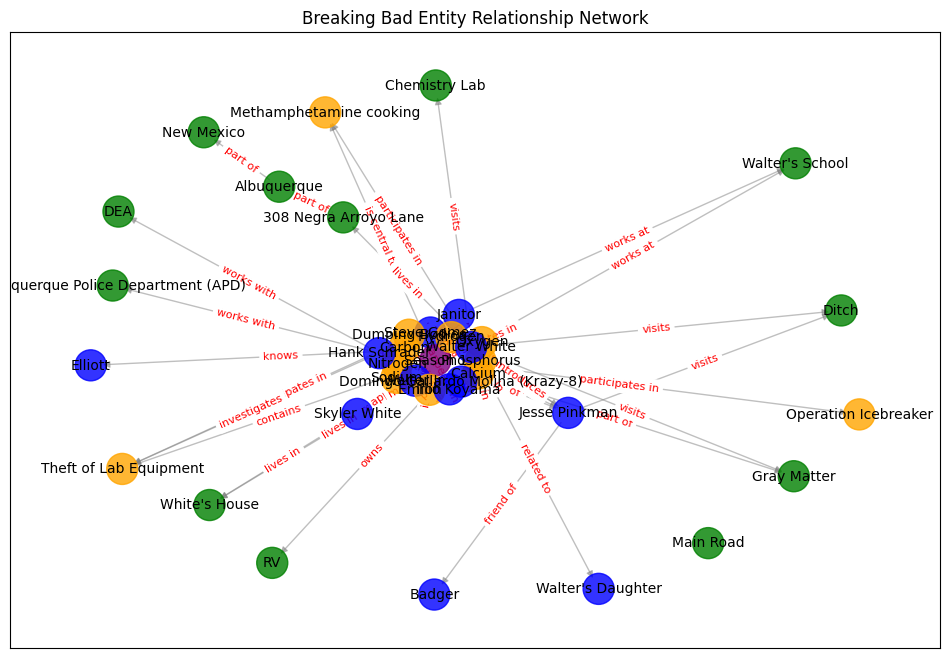

In [ ]:
import matplotlib.pyplot as plt

# Positioning the nodes with a spring layout
pos = nx.spring_layout(G, seed=42)  # spring_layout gives a good spread-out view

# Plot nodes, colored by their type
entity_colors = {'Character': 'blue', 'Location': 'green', 'Event': 'orange', 'Season': 'purple'}
node_colors = [entity_colors.get(G.nodes[node]['entity_type'], 'gray') for node in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=10, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Adding edge labels for relationships
edge_labels = {(u, v): data['relation'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")

plt.title("Breaking Bad Entity Relationship Network")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Recreate positions using spring layout for consistency
pos = nx.spring_layout(G, seed=42)

# Extract node positions
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['entity_type']})")
    node_color.append(entity_colors.get(G.nodes[node]['entity_type'], 'gray'))

# Extract edge positions
edge_x = []
edge_y = []
edge_text = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_text.append(f"{edge[0]} {edge[2]['relation']} {edge[1]} (Season {edge[2]['season']})")

# Create the Plotly figure
fig = go.Figure()

# Add edges as lines
fig.add_trace(go.Scatter(x=edge_x, y=edge_y,
                         line=dict(width=0.5, color='gray'),
                         hoverinfo='text',
                         mode='lines'))

# Add nodes as points
fig.add_trace(go.Scatter(x=node_x, y=node_y,
                         mode='markers+text',
                         text=node_text,
                         hoverinfo='text',
                         marker=dict(size=10, color=node_color, line_width=2)))

# Customize layout
fig.update_layout(showlegend=False, hovermode='closest',
                  title="Interactive Breaking Bad Entity Relationship Network",
                  margin=dict(b=0, l=0, r=0, t=40))

fig.show()


### Network Analysis (Jeppe)

Degree Centrality: {}
Betweenness Centrality: {}
Closeness Centrality: {}


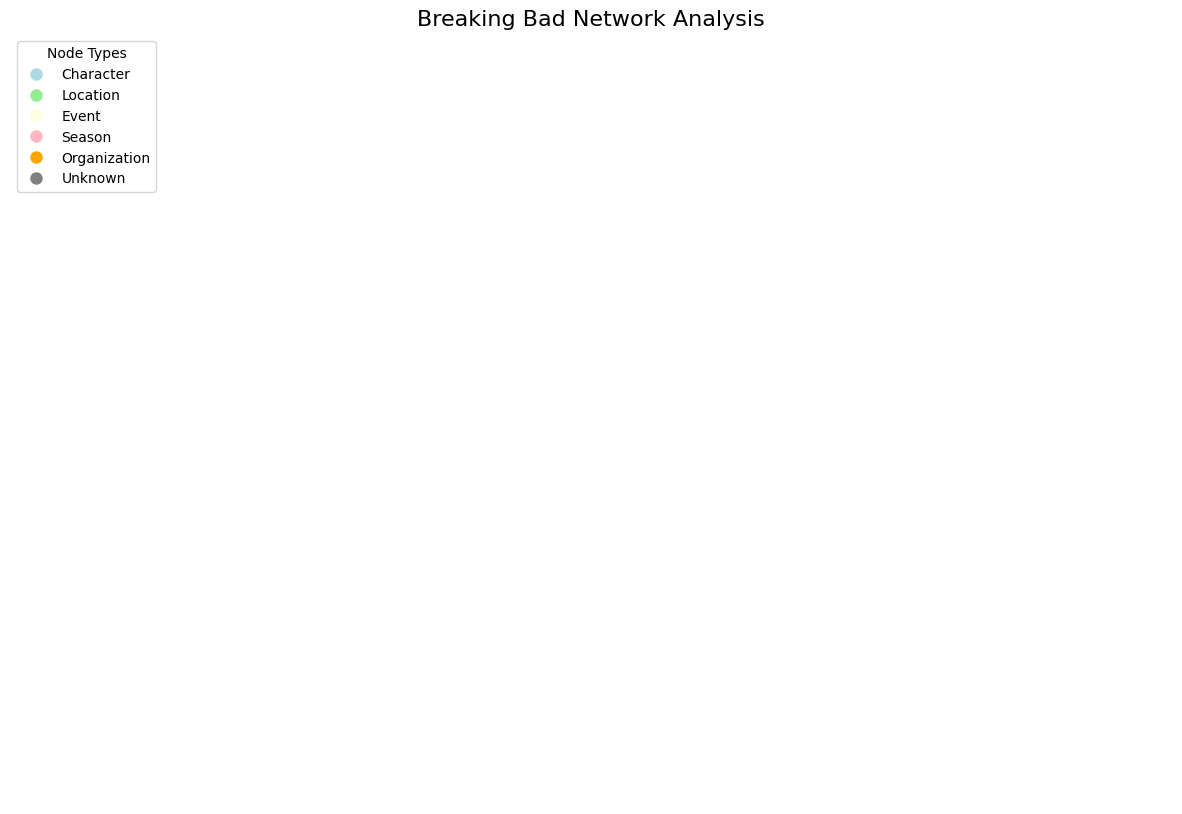

Number of nodes: 0
Number of edges: 0
Network density: 0.0000


ZeroDivisionError: division by zero

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæs JSON-data
with open('breaking_bad_analysis.json', 'r') as file:
    data = json.load(file)

# Opret en graf
G = nx.Graph()

# Tilføj noder og kanter
for episode in data.values():
    for entity in episode['entities']:
        G.add_node(entity['name'], type=entity.get('type', 'Unknown'))
    for relationship in episode['relationships']:
        G.add_edge(relationship['source'], relationship['target'],
                   relation=relationship['relation'], season=relationship['season'])

# Definer farver for forskellige nodetyper
color_map = {
    'Character': 'lightblue',
    'Location': 'lightgreen',
    'Event': 'lightyellow',
    'Season': 'lightpink',
    'Organization': 'orange',
    'Unknown': 'gray'
}

# Funktion til at håndtere ukendte nodetyper
def get_color(node_type):
    return color_map.get(node_type, 'gray')

node_colors = [get_color(G.nodes[node].get('type', 'Unknown')) for node in G.nodes()]

# Beregn node størrelse baseret på grad
node_sizes = [300 * (1 + G.degree(node)) for node in G.nodes()]

# Opret plot
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Tegn noder
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)

# Tegn kanter
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Tilføj labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

# Tilføj kantetiketter
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Tilføj legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                   markerfacecolor=value, markersize=10)
                   for key, value in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', title='Node Types')

plt.title("Breaking Bad Network Analysis", fontsize=16)
plt.axis('off')

# Beregn og udskriv centralitet
print("Degree Centrality:", nx.degree_centrality(G))
print("Betweenness Centrality:", nx.betweenness_centrality(G))
print("Closeness Centrality:", nx.closeness_centrality(G))

# Gem plot som en høj-opløsnings fil
plt.savefig('breaking_bad_network.png', dpi=300, bbox_inches='tight')
plt.show()

# Udskriv nogle grundlæggende netværksstatistikker
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

Degree Centrality: {'Walter White': 0.36363636363636365, 'Janitor': 0.09090909090909091, 'Daughter': 0.09090909090909091, 'Steve Gomez': 0.09090909090909091, 'Hank Schrader': 0.09090909090909091, 'Krazy-8': 0.09090909090909091, 'Emilio Koyama': 0.09090909090909091, 'Jesse Pinkman': 0.18181818181818182, 'Skyler White': 0.18181818181818182, 'Walter Jr.': 0.18181818181818182, 'Elliott': 0.09090909090909091, 'Badger': 0.09090909090909091}
Betweenness Centrality: {'Walter White': 0.14545454545454545, 'Janitor': 0.0, 'Daughter': 0.0, 'Steve Gomez': 0.0, 'Hank Schrader': 0.0, 'Krazy-8': 0.0, 'Emilio Koyama': 0.0, 'Jesse Pinkman': 0.07272727272727272, 'Skyler White': 0.0, 'Walter Jr.': 0.0, 'Elliott': 0.0, 'Badger': 0.0}
Closeness Centrality: {'Walter White': 0.3787878787878788, 'Janitor': 0.09090909090909091, 'Daughter': 0.09090909090909091, 'Steve Gomez': 0.09090909090909091, 'Hank Schrader': 0.09090909090909091, 'Krazy-8': 0.09090909090909091, 'Emilio Koyama': 0.09090909090909091, 'Jesse Pi

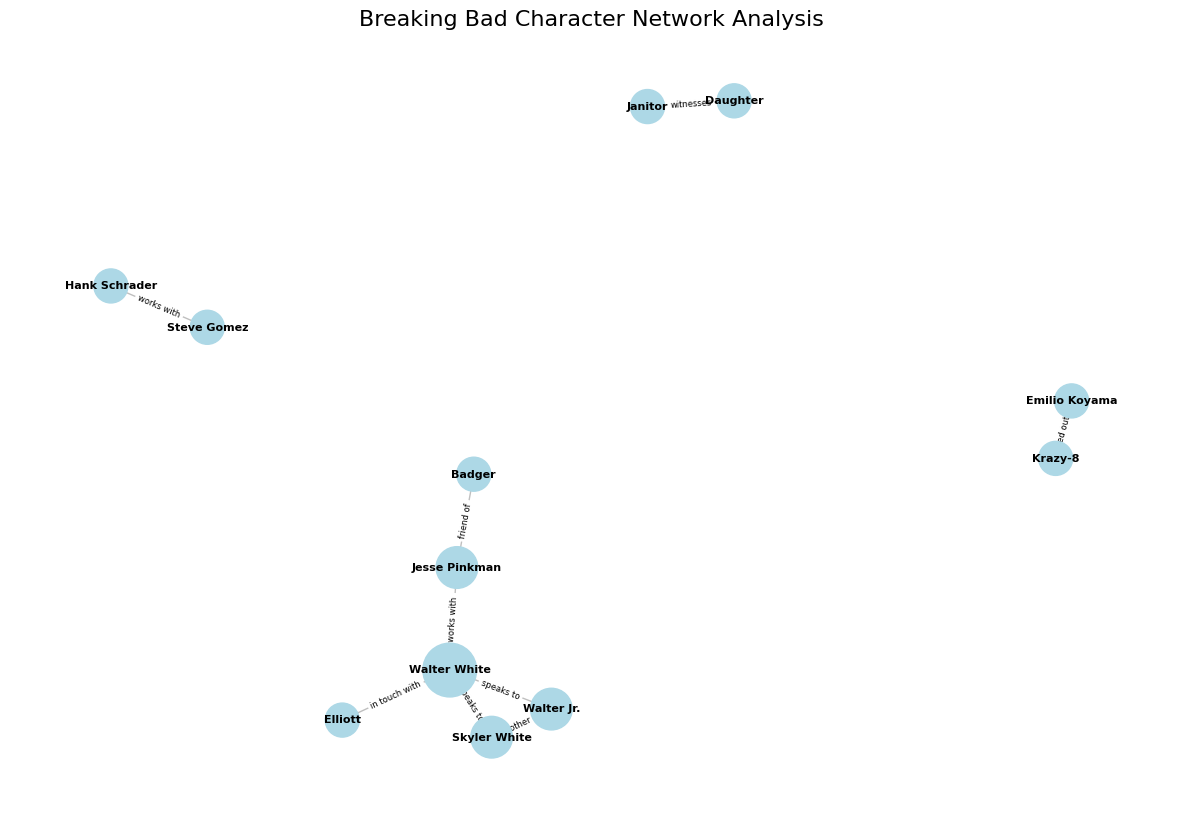

Number of character nodes: 12
Number of relationships: 9
Network density: 0.1364
Average clustering coefficient: 0.1806

Top 5 characters by degree centrality: [('Walter White', 0.36363636363636365), ('Jesse Pinkman', 0.18181818181818182), ('Skyler White', 0.18181818181818182), ('Walter Jr.', 0.18181818181818182), ('Janitor', 0.09090909090909091)]
Top 5 characters by betweenness centrality: [('Walter White', 0.14545454545454545), ('Jesse Pinkman', 0.07272727272727272), ('Janitor', 0.0), ('Daughter', 0.0), ('Steve Gomez', 0.0)]
Top 5 characters by closeness centrality: [('Walter White', 0.3787878787878788), ('Jesse Pinkman', 0.28409090909090906), ('Skyler White', 0.25252525252525254), ('Walter Jr.', 0.25252525252525254), ('Elliott', 0.22727272727272727)]


In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Indlæs JSON-data
with open('breaking_bad_analysis.json', 'r') as file:
    data = json.load(file)

# Opret en graf
G = nx.Graph()

# Tilføj kun karakter-noder og deres relationer
character_nodes = set()
for episode in data.values():
    for entity in episode['entities']:
        if entity['type'] == 'Character':
            character_nodes.add(entity['name'])
            G.add_node(entity['name'])

    for relationship in episode['relationships']:
        if relationship['source'] in character_nodes and relationship['target'] in character_nodes:
            G.add_edge(relationship['source'], relationship['target'],
                       relation=relationship['relation'], season=relationship['season'])

# Beregn node størrelse baseret på grad
node_sizes = [300 * (1 + G.degree(node)) for node in G.nodes()]

# Opret plot
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Tegn noder
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)

# Tegn kanter
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Tilføj labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

# Tilføj kantetiketter
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Breaking Bad Character Network Analysis", fontsize=16)
plt.axis('off')

# Beregn og udskriv centralitet
print("Degree Centrality:", nx.degree_centrality(G))
print("Betweenness Centrality:", nx.betweenness_centrality(G))
print("Closeness Centrality:", nx.closeness_centrality(G))

# Gem plot som en høj-opløsnings fil
plt.savefig('breaking_bad_character_network.png', dpi=300, bbox_inches='tight')
plt.show()

# Udskriv nogle grundlæggende netværksstatistikker
print(f"Number of character nodes: {G.number_of_nodes()}")
print(f"Number of relationships: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

# Find de mest centrale karakterer baseret på forskellige centralitetsmål
top_degree = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 characters by degree centrality:", top_degree)
print("Top 5 characters by betweenness centrality:", top_betweenness)
print("Top 5 characters by closeness centrality:", top_closeness)

### Text Classification using...

# SPLIT BY SEASON:


> SKAL NOK BARE SLETTES????
> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????> SKAL NOK BARE SLETTES????


In [ ]:
import os

def combine_txt_files_by_season(root_dir):
    # Gå gennem hver sæson i roden
    for dirpath, dirnames, filenames in os.walk(root_dir):
        season_name = os.path.basename(dirpath)  # Hent sæsonnavn fra stien

        # Opret outputfilnavn i root_dir
        combined_output_file = os.path.join(root_dir, f"{season_name}_combined.txt")

        with open(combined_output_file, 'w', encoding='utf-8') as outfile:
            for filename in filenames:
                if filename.endswith('.txt'):
                    file_path = os.path.join(dirpath, filename)
                    with open(file_path, 'r', encoding='utf-8') as infile:
                        outfile.write(infile.read())
                    outfile.write("\n")  # Ny linje efter hver episode

        print(f"Combined {len(filenames)} files into {combined_output_file}")

# Sti til 'subtitles' mappen
subtitles_dir = 'subtitles'

# Kombiner tekstfiler efter sæson i root_dir
combine_txt_files_by_season(subtitles_dir)

print("Alle .txt filer er blevet kombineret for hver sæson og gemt i root_dir.")


Combined 0 files into subtitles/subtitles_combined.txt
Combined 8 files into subtitles/Season_5A_combined.txt
Combined 13 files into subtitles/Season_2_combined.txt
Combined 13 files into subtitles/Season_4_combined.txt
Combined 8 files into subtitles/Season_5B_combined.txt
Combined 7 files into subtitles/Season_1_combined.txt
Combined 13 files into subtitles/Season_3_combined.txt
Alle .txt filer er blevet kombineret for hver sæson og gemt i root_dir.


In [ ]:
import os
import shutil

def remove_season_folders(root_dir):
    # Gå gennem alle mapper i root_dir
    for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
        for dirname in dirnames:
            # Tjek om mappenavnet indeholder 'Season_'
            if 'Season_' in dirname:
                folder_path = os.path.join(dirpath, dirname)
                try:
                    shutil.rmtree(folder_path)  # Slet mappen og dens indhold
                    print(f"Removed folder: {folder_path}")
                except Exception as e:
                    print(f"Error removing folder {folder_path}: {str(e)}")

# Sti til 'subtitles' mappen
subtitles_dir = 'subtitles'

# Fjern alle mapper med 'Season_' i navnet
remove_season_folders(subtitles_dir)

print("Alle mapper med 'Season_' i navnet er blevet fjernet.")


Removed folder: subtitles/Season_5A
Removed folder: subtitles/Season_2
Removed folder: subtitles/Season_4
Removed folder: subtitles/Season_5B
Removed folder: subtitles/Season_1
Removed folder: subtitles/Season_3
Alle mapper med 'Season_' i navnet er blevet fjernet.


In [ ]:
import os

def remove_combined_files(root_dir):
    # Gå gennem alle filer og mapper i root_dir
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            # Tjek om filnavnet indeholder '_combined.txt'
            if '_combined.txt' in filename:
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)  # Slet filen
                    print(f"Removed: {file_path}")
                except Exception as e:
                    print(f"Error removing file {file_path}: {str(e)}")

# Sti til 'subtitles' mappen
subtitles_dir = 'subtitles'

# Fjern alle filer med '_combined.txt' i navnet
remove_combined_files(subtitles_dir)

print("Alle filer med '_combined.txt' er blevet fjernet.")


Removed: subtitles/Season_1_combined.txt
Removed: subtitles/Season_2_combined.txt
Removed: subtitles/subtitles_combined.txt
Removed: subtitles/Season_5A_combined.txt
Removed: subtitles/Season_5B_combined.txt
Removed: subtitles/Season_3_combined.txt
Removed: subtitles/Season_4_combined.txt
Removed: subtitles/Season_5A/Season_5A_combined.txt
Removed: subtitles/Season_2/Season_2_combined.txt
Removed: subtitles/Season_4/Season_4_combined.txt
Removed: subtitles/Season_5B/Season_5B_combined.txt
Removed: subtitles/Season_1/Season_1_combined.txt
Removed: subtitles/Season_3/Season_3_combined.txt
Alle filer med '_combined.txt' er blevet fjernet.


In [ ]:
import json
import os
from typing import Dict, Any

def extract_relationships(script_content: str, season_number: str) -> dict:
    prompt = f"""
    Analyze the following Breaking Bad season script and identify entities and their relationships.
    Season: {season_number}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character" | "Location" | "Event" | "Season"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "lives in" | "visits" | "owns" | "participates in" | "witnesses" | "causes" | "appears in" | "is central to" | "introduces" | "concludes" | "develops" | "part of",
                "target": "string",
                "season": "{season_number}"
            }}
        ]
    }}

    IMPORTANT: Return ONLY the JSON object, no additional text or explanation.
    """

    try:
        response = client.chat.completions.create(
            model='Qwen/Qwen2.5-72B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        response_text = response.choices[0].message.content.strip()

        # Find JSON i svaret hvis det er omgivet af andet tekst
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > json_start:
            json_str = response_text[json_start:json_end]
            try:
                data = json.loads(json_str)
                return data
            except json.JSONDecodeError:
                print(f"Invalid JSON received: {json_str}")
                return {"entities": [], "relationships": []}
        else:
            print(f"No JSON found in response: {response_text}")
            return {"entities": [], "relationships": []}

    except Exception as e:
        print(f"Error processing season {season_number}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_seasons(subtitles_dir: str) -> dict:
    all_season_data = {}

    for filename in sorted(os.listdir(subtitles_dir)):
        if filename.endswith('_combined.txt'):
            try:
                season_number = filename.split('_')[1]
                file_path = os.path.join(subtitles_dir, filename)

                print(f"\nProcessing Season {season_number}...")

                with open(file_path, 'r', encoding='utf-8') as file:
                    script_content = file.read()

                season_data = extract_relationships(script_content, season_number)
                if season_data["entities"] or season_data["relationships"]:
                    all_season_data[f"Season_{season_number}"] = season_data

            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
                continue

    return all_season_data

# Kør analysen
all_season_data = analyze_all_seasons('subtitles')

# Gem resultater
with open('breaking_bad_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_season_data, f, indent=4, ensure_ascii=False)

print("\nAnalysis complete! Results saved to 'breaking_bad_analysis.json'")
print(f"Processed {len(all_season_data)} seasons")

# Vis eksempel på data
if all_season_data:
    first_season = next(iter(all_season_data))
    print(f"\nSample of the data (first season):")
    print(json.dumps({first_season: all_season_data[first_season]}, indent=4))


Processing Season 1...

Processing Season 2...

Processing Season 3...

Processing Season 4...

Processing Season 5A...

Processing Season 5B...

Analysis complete! Results saved to 'breaking_bad_analysis.json'
Processed 6 seasons

Sample of the data (first season):
{
    "Season_1": {
        "entities": [
            {
                "name": "Walter White",
                "type": "Character"
            },
            {
                "name": "Jesse Pinkman",
                "type": "Character"
            },
            {
                "name": "Hank Schrader",
                "type": "Character"
            },
            {
                "name": "Skyler White",
                "type": "Character"
            },
            {
                "name": "Walter Jr. White",
                "type": "Character"
            },
            {
                "name": "Jane Margolis",
                "type": "Character"
            },
            {
                "name": "New Mexico",
 

In [ ]:
response = client.chat.completions.create(
    model='Qwen/Qwen2.5-72B-Instruct-Turbo',
    messages=[
        {'role': 'system', 'content': SYSTEM_PROMPT},
        {'role': 'user', 'content': prompt}
    ],
    temperature=0.7
)

print("Response from server:", response)


NameError: name 'prompt' is not defined

In [ ]:
import json
import os
from typing import Dict, Any

def extract_relationships(script_content: str, season_label: str) -> Dict[str, Any]:
    # Fjern header linjer der starter med "---"
    cleaned_content = '\n'.join(line for line in script_content.split('\n')
                              if not line.strip().startswith('---'))

    prompt = f"""
    Analyze the following Breaking Bad season script and identify entities and their relationships.
    Season: {season_label}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character" | "Location" | "Event" | "Season"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "lives in" | "visits" | "owns" | "participates in" | "witnesses" | "causes" | "appears in" | "is central to" | "introduces" | "concludes" | "develops" | "part of",
                "target": "string",
                "season": "{season_label}"
            }}
        ]
    }}

    Script content:
    {cleaned_content[:1000]}...
    """

    try:
        response = client.chat.completions.create(
            model='Qwen/Qwen2.5-72B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        # Get response and fix weird characters
        response_text = ''.join(char for char in response.choices[0].message.content if ord(char) >= 32 or char in '\n\r\t')

        # Parse JSON
        data = json.loads(response_text)
        return data

    except Exception as e:
        print(f"Error processing season {season_label}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_seasons(subtitles_dir: str) -> Dict[str, Any]:
    all_season_data = {}

    # Find all combined season files
    for filename in sorted(os.listdir(subtitles_dir)):
        # Skip .ipynb_checkpoints and other unwanted files
        if filename.startswith('.') or 'checkpoints' in filename:
            continue

        if filename.startswith('Season_') and filename.endswith('_combined.txt'):
            try:
                # Extract season label from filename
                season_label = filename.split('_')[1]
                file_path = os.path.join(subtitles_dir, filename)

                print(f"Processing Season {season_label}...")

                # Read and analyze the season
                with open(file_path, 'r', encoding='utf-8') as file:
                    script_content = file.read()

                season_data = extract_relationships(script_content, season_label)
                if season_data["entities"] or season_data["relationships"]:
                    all_season_data[f"Season_{season_label}"] = season_data

            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
                continue

    return all_season_data

# Analyze seasons and save results
all_season_data = analyze_all_seasons('subtitles')

# Save to JSON file
with open('breaking_bad_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_season_data, f, indent=4, ensure_ascii=False)

print("\nAnalysis complete! Results saved to 'breaking_bad_analysis.json'")
print(f"Processed {len(all_season_data)} seasons")

# Print summary
print("\nAnalysis complete! Results saved to 'breaking_bad_analysis.json'")
print(f"Processed {len(all_season_data)} seasons")

# Print sample of the data
print("\nSample of the data:")
print(json.dumps(dict(list(all_season_data.items())[:1]), indent=4))

Processing Season 1...


KeyboardInterrupt: 

# TO BE REMOVED

In [ ]:
def extract_relationships(script_content, episode_name, season_number):
    prompt = f"""
    Analyze the following Breaking Bad episode script and identify entities and their relationships.
    Episode: {episode_name}
    Season: {season_number}

    Please output ONLY a valid JSON object following exactly this schema:
    {{
        "entities": [
            {{
                "name": "string",
                "type": "Character" | "Location" | "Event" | "Season"
            }}
        ],
        "relationships": [
            {{
                "source": "string",
                "relation": "friend of" | "enemy of" | "related to" | "married to" | "works with" | "lives in" | "visits" | "owns" | "participates in" | "witnesses" | "causes" | "appears in" | "is central to" | "introduces" | "concludes" | "develops" | "part of",
                "target": "string",
                "season": {season_number}
            }}
        ]
    }}

    Script content:
    {script_content[:1000]}...
    """

    try:
        response = client.chat.completions.create(
            model='Qwen/Qwen2.5-72B-Instruct-Turbo',
            messages=[
                {'role': 'system', 'content': SYSTEM_PROMPT},
                {'role': 'user', 'content': prompt}
            ],
            temperature=0.7
        )

        # Extract response text
        response_text = response.choices[0].message.content.strip()

        # Try to find JSON object in response
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1
        if json_start >= 0 and json_end > json_start:
            json_str = response_text[json_start:json_end]

            # Parse JSON
            data = json.loads(json_str)
            return data

    except Exception as e:
        print(f"Error processing episode {episode_name}: {str(e)}")
        return {"entities": [], "relationships": []}

def analyze_all_episodes(subtitles_dir):
    all_episode_data = {}

    for season_dir in sorted(os.listdir(subtitles_dir)):
        season_path = os.path.join(subtitles_dir, season_dir)
        if os.path.isdir(season_path):
            # Extract season number from directory name
            season_number = int(season_dir.split('_')[1]) if season_dir.split('_')[1].isdigit() else 0
            print(f"\nProcessing {season_dir}")

            for episode_file in sorted(os.listdir(season_path)):
                if episode_file.endswith('.txt'):
                    episode_path = os.path.join(season_path, episode_file)

                    # Clean episode name
                    clean_episode_name = episode_file.replace('%27', "'").replace('%20', " ")

                    try:
                        with open(episode_path, 'r', encoding='utf-8') as file:
                            script_content = file.read()

                        print(f"Analyzing: {clean_episode_name}")
                        episode_data = extract_relationships(script_content, clean_episode_name, season_number)

                        if episode_data["entities"] or episode_data["relationships"]:
                            all_episode_data[f"{season_dir} - {clean_episode_name}"] = episode_data

                    except Exception as e:
                        print(f"Error reading file {episode_path}: {str(e)}")
                        continue

    return all_episode_data

# Analyze and store results
all_episode_data = analyze_all_episodes(subtitles_dir)

# Print results in a structured format
for episode, data in all_episode_data.items():
    if data["entities"] or data["relationships"]:
        print(f"\n=== {episode} ===")

        if data["entities"]:
            print("\nEntities:")
            for entity in data["entities"]:
                print(f"• {entity['name']} ({entity['type']})")

        if data["relationships"]:
            print("\nRelationships:")
            for rel in data["relationships"]:
                print(f"• {rel['source']} -> {rel['relation']} -> {rel['target']} (Season {rel['season']})")